In [48]:
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [2]:
data = pd.read_csv('the_office.csv')

In [3]:
data

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,Matt Sohn,Dan Sterling,8.0,1484,2013-04-11,273,59,2965,24,Andy;Angela;Creed;Dwight;Erin;Jim;Kevin;Meredi...
182,9,20,Paper Airplane,Jesse Peretz,Halsted Sullivan;Warren Lieberstein,8.0,1482,2013-04-25,234,48,2564,27,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
183,9,21,Livin' the Dream,Jeffrey Blitz,Nicki Schwartz-Wright,8.9,2041,2013-05-02,382,33,4333,20,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
184,9,22,A.A.R.M,David Rogers,Brent Forrester,9.3,2860,2013-05-09,501,54,4965,30,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...


In [4]:
display(data.info())
display(data.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        186 non-null    int64  
 1   episode       186 non-null    int64  
 2   episode_name  186 non-null    object 
 3   director      186 non-null    object 
 4   writer        186 non-null    object 
 5   imdb_rating   186 non-null    float64
 6   total_votes   186 non-null    int64  
 7   air_date      186 non-null    object 
 8   n_lines       186 non-null    int64  
 9   n_directions  186 non-null    int64  
 10  n_words       186 non-null    int64  
 11  n_speak_char  186 non-null    int64  
 12  main_chars    186 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


None

,season,episode,imdb_rating,total_votes,n_lines,n_directions,n_words,n_speak_char
count,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00
mean,5.46,12.48,8.25,2129.54,296.40,50.15,3053.51,20.69
std,2.40,7.23,0.54,790.79,82.00,23.94,799.27,5.09
min,1.00,1.00,6.70,1393.00,131.00,11.00,1098.00,12.00
25%,3.00,6.00,7.90,1628.50,255.25,34.00,2670.25,17.00
50%,6.00,12.00,8.20,1954.00,281.00,46.00,2872.50,20.00
75%,7.75,18.00,8.60,2385.00,314.50,60.00,3141.00,23.00
max,9.00,28.00,9.70,7934.00,625.00,166.00,6076.00,54.00


In [5]:
num_data = data.copy()
num_data = num_data.drop(columns = ['episode_name', 'director', 'writer', 'air_date', 'main_chars'])

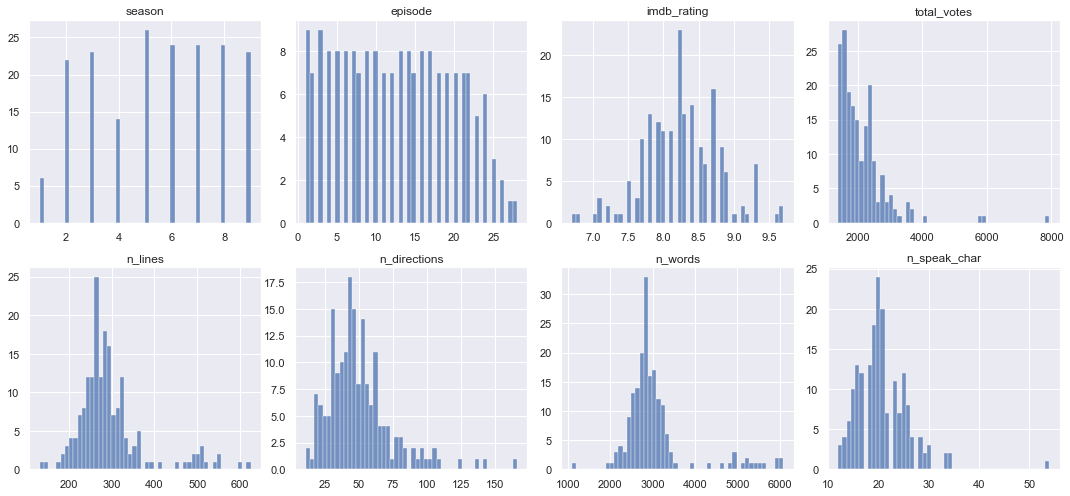

In [62]:
%matplotlib inline

fig, axes = plt.subplots(figsize=(15,7), ncols=4, nrows=2)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.histplot(data = num_data.iloc[:, i], bins=50, ax=ax)
    ax.set_title(num_data.iloc[:,i].name)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

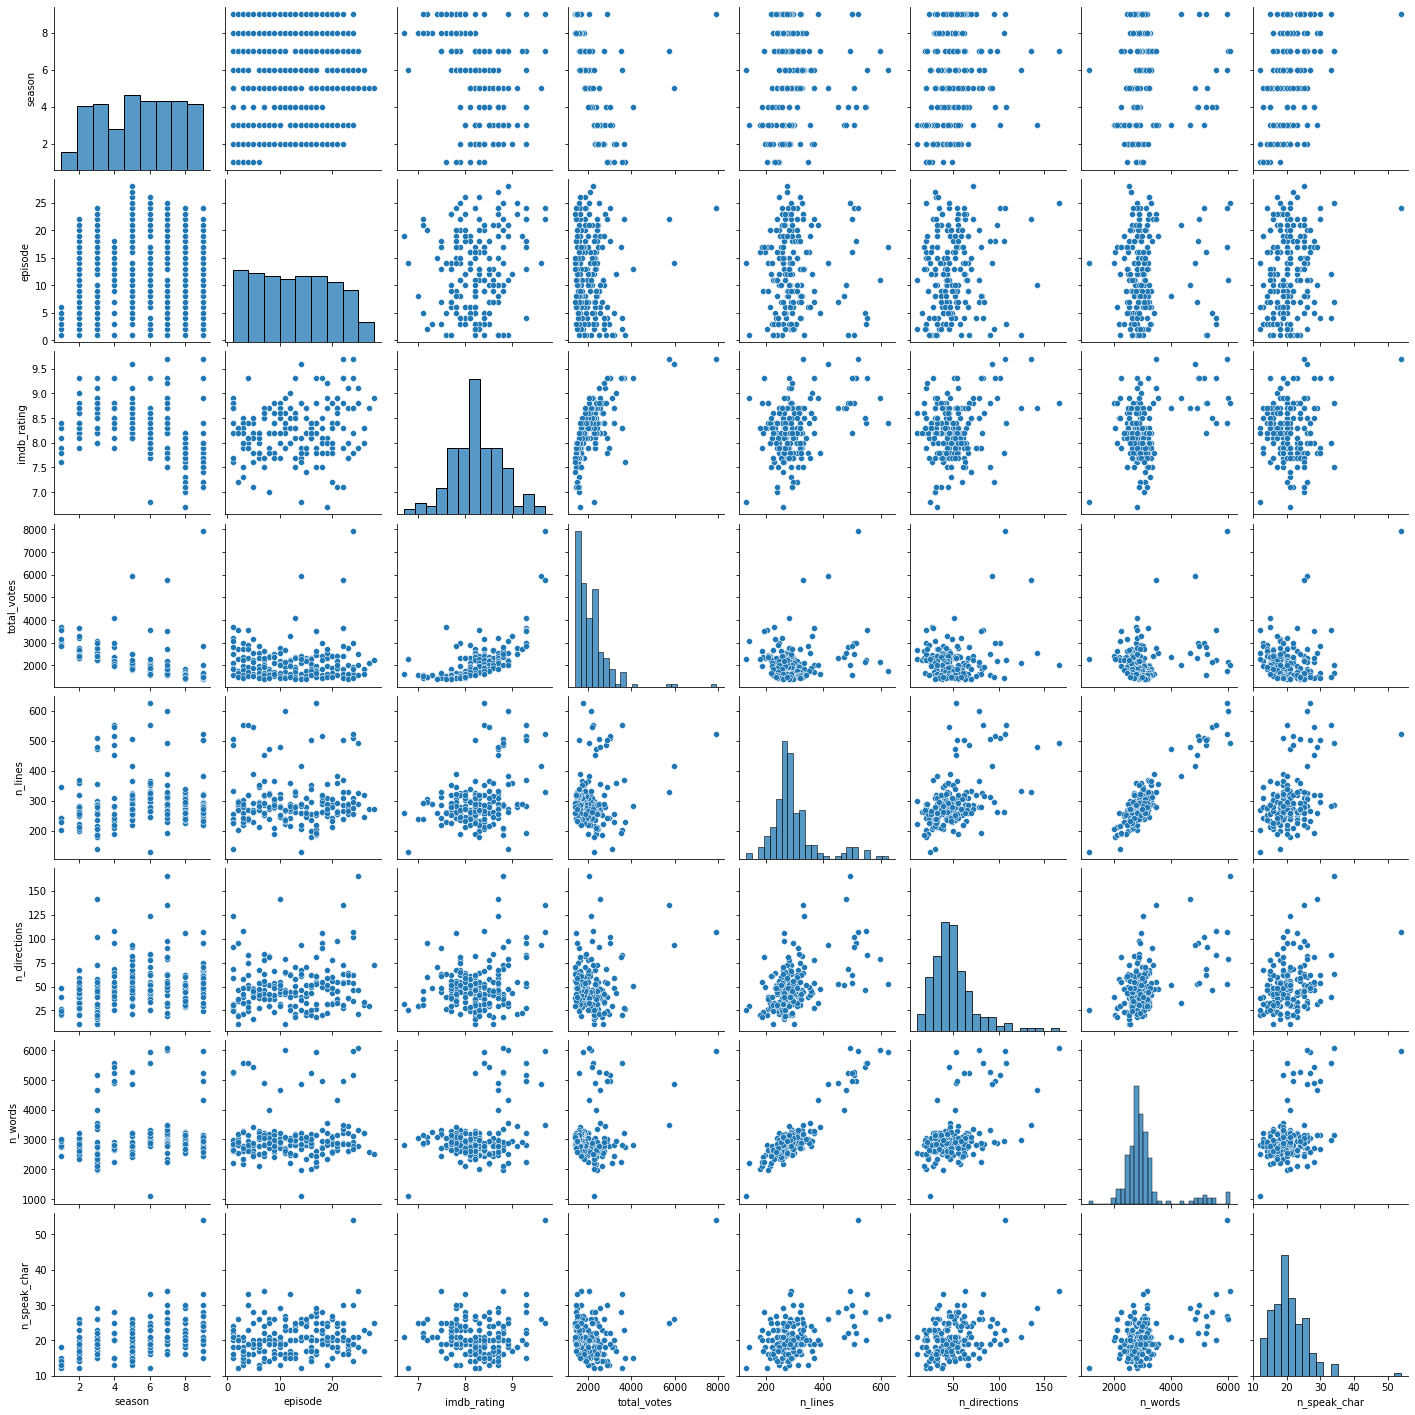

In [7]:
sns.pairplot(data = data)

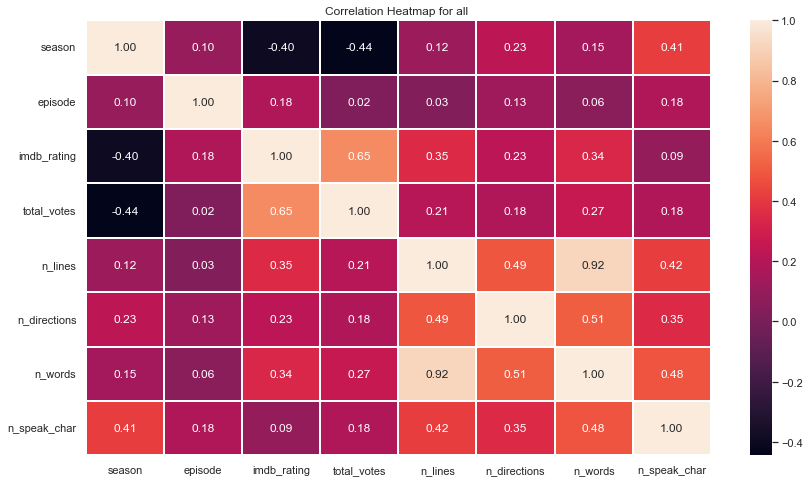

In [8]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.heatmap(num_data.corr(), annot = True, fmt = '.2f', linewidths = 2)
plt.title("Correlation Heatmap for all ")
plt.show()

In [31]:
director = data[['director', 'imdb_rating']]
df = director.reindex(columns=list(['director', 'imdb_rating', 'freq']), fill_value=1)

In [59]:
stat = df.groupby('director')[['director', 'imdb_rating', 'freq']].sum()
stat['mean_rating'] = round(stat['imdb_rating'] / stat['freq'], 1)
stat = stat.drop(columns=['imdb_rating'])

In [60]:
stat.sort_values(by='mean_rating', ascending=False)

,freq,mean_rating
director,,
Harold Ramis,3,8.9
Jason Reitman,2,8.7
Paul Feig,14,8.7
Gene Stupnitsky;Lee Eisenberg,1,8.7
Steve Carell,3,8.7
...,...,...
Ed Helms,2,7.6
Eric Appel,1,7.5
Alex Hardcastle,1,7.5


In [45]:
df[df['director']=='Paul Feig']

,director,imdb_rating,freq
8,Paul Feig,8.4,1
10,Paul Feig,8.2,1
13,Paul Feig,8.2,1
14,Paul Feig,8.4,1
57,Paul Feig,8.3,1
59,Paul Feig,9.3,1
64,Paul Feig,9.3,1
65,Paul Feig,8.8,1
73,Paul Feig,8.7,1
74,Paul Feig,8.4,1


(array([ 2.,  0.,  5.,  6.,  2., 15.,  8., 11., 11.,  1.]),
 array([7.1 , 7.28, 7.46, 7.64, 7.82, 8.  , 8.18, 8.36, 8.54, 8.72, 8.9 ]),
 <BarContainer object of 10 artists>)

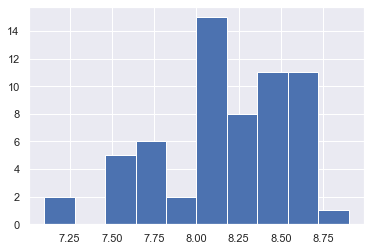

In [64]:
plt.hist(stat['mean_rating'])

In [53]:
writer = data[['writer', 'imdb_rating']]
df2 = writer.reindex(columns=list(['writer', 'imdb_rating', 'freq']), fill_value=1)
stat2 = df2.groupby('writer')[['writer', 'imdb_rating', 'freq']].sum()
stat2['mean_rating'] = round(stat2['imdb_rating'] / stat2['freq'], 1)
stat2 = stat2.drop(columns=['imdb_rating'])
stat2.sort_values(by='mean_rating', ascending=False)

,freq,mean_rating
writer,,
Paul Lieberstein;Michael Schur,1,9.3
Greg Daniels;Mindy Kaling,1,9.3
Jennifer Celotta;Paul Lieberstein,2,9.1
Jennifer Celotta;Greg Daniels,1,9.1
Steve Carell,2,8.8
Lee Eisenberg;Gene Stupnitsky;Michael Schur,1,8.8
Greg Daniels,9,8.7
Jon Vitti,2,8.6
Michael Schur;Lee Eisenberg;Gene Stupnitsky,1,8.6


In [56]:
stat2.shape

(47, 2)

(array([ 1.,  0.,  3.,  7.,  6.,  7., 12.,  5.,  2.,  4.]),
 array([6.8 , 7.05, 7.3 , 7.55, 7.8 , 8.05, 8.3 , 8.55, 8.8 , 9.05, 9.3 ]),
 <BarContainer object of 10 artists>)

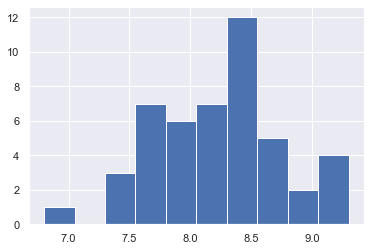

In [63]:
plt.hist(stat2['mean_rating'])

1. Convert 'director' and 'writer' into numerical variables.
2. Delete 'episode_name', 'air_date', and 'main_chars'.
3. PCA (all? last four?)